# Lab 5 - Big Data Visualization

## 1. Handling Volume of Big Data
In this section, you will explore how to handling the volume of big data by sampling. First we will load the synthetic 2-D data poitns by scikit-learn.

Note: we need to install the following **imbalanced-learn** package:
```python
conda install imbalanced-learn
```
or
```python
pip install imbalanced-learn
```

In [74]:
from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from imblearn.datasets import make_imbalance
%matplotlib inline

Now you will visualize the dataset. Complete the code marked with TODO

X data:  [[-1.22144567  8.64205655]
 [-6.55166564  6.50550091]
 [-5.15799864 11.58062329]
 [-8.04087249  3.03325301]
 [-4.74177238 13.2962801 ]
 [ 1.44596211  4.46734885]
 [-7.049318    1.95276762]
 [-6.74316621  1.44005   ]
 [-5.23111125  9.56889908]
 [-2.07396228  7.51924938]] 

y data:  [0 0 0 0 0 0 0 0 0 0] 


Distribution before imbalancing: Counter({2: 100, 0: 100, 1: 100})
Distribution after imbalancing: Counter({2: 100, 1: 40, 0: 20})


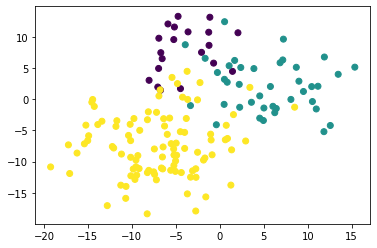

In [75]:
"""
Generate random 2D data points
"""
from collections import Counter
def gen_data(num_samples,num_blobs=3,random_state=42):
    X, y = make_blobs(n_samples=num_samples, random_state=random_state, centers=num_blobs, cluster_std=5.0)
    return X,y

rseed = 42
num_samples = 300
num_blobs   = 3
print('X data: ', X[:10], '\n')
print('y data: ', y[:10], '\n\n')
X,y = gen_data(num_samples, num_blobs, rseed)
print('Distribution before imbalancing: {}'.format(Counter(y)))

ratio = {0: 20, 1: 40, 2: 100}

X,y = make_imbalance(X, y, sampling_strategy = ratio)

print('Distribution after imbalancing: {}'.format(Counter(y)))

plt.scatter(X[:,0], X[:,1], c = y)

### 1.1. Simple Random Sampling (SRS)
Now we implement the first sampling method, called Simple Random Smapling (SRS). In this method, there is an equal probability of selecting any particular item. Complete the code marked with TODO.

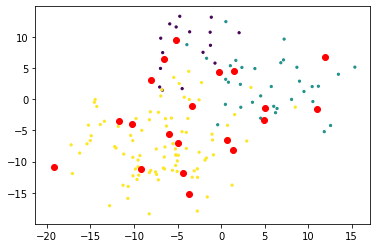

In [76]:
def srs(points, k=10):
    return np.random.permutation(points)[:k]


np.random.seed(30)
sample = srs(X, 20)

# Visualize the sample
_ = plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
_ = plt.scatter(sample[:, 0], sample[:, 1], c='red')

### 1.2. Stratified Sampling
Now we will explore another sampling method, called stratified sampling. This method comprises of two steps:

1. Split the data into several partitions. We will use the label information for this purpose
2. Draw random samples from each partition. For simplicity, we make the stratified random samples of the same size.

<class 'list'>


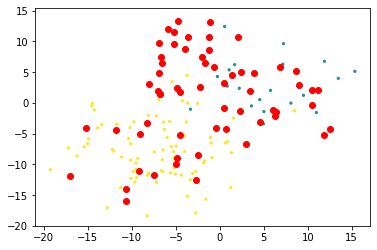

In [158]:
from functools import reduce

def stratified_sampling(points, cluster_labels, n_clusters=3, k=10):
    # Partition data according to labels
    
    partitions = []
    cluster_samples = []
    
    # For each label [0, 1, 2]
    for l in set(cluster_labels):
        # Add to the cluster_samples array, an array of random samples 
        # pulled from the data associated with that label
        cluster_samples.append( srs(points[cluster_labels == l], k) )
    
    # The whole sampling data is each strata appended
    print(type(cluster_samples))
    sample = reduce((lambda x,y: np.concatenate((x,y))), cluster_samples)
    return np.array(sample)


sample = stratified_sampling(X, y, num_blobs, 20)

_ = plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
_ = plt.scatter(sample[:, 0], sample[:, 1], c='red')

Now we want to improve stratified sampling such that:
+ The stratified random samples are not of the same size but proportion to the size of clusters
+ Each cluster has at least one sampling points

Complete the code marked with TODO 

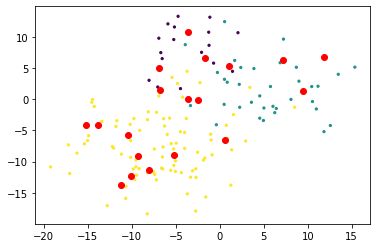

In [176]:
def hybrid_sampling(points, cluster_labels, n_clusters=3, k=10):
    
    partitions = []
    cluster_samples = []

    # Make proportionate ----------------------------------------------------
    
    # For each label [0, 1, 2]
    for l in set(cluster_labels):
        # Add to the cluster_samples array, an array of random samples 
        # pulled from the data associated with that label
        this_cluster = points[cluster_labels == l]
        
        scaled_length = int(k / ( len(cluster_labels) / len(this_cluster) ))

        cluster_samples.append( srs(this_cluster, scaled_length) )
        
    # The whole sampling data is each strata appended
    sample = reduce((lambda x,y: np.concatenate((x,y))), cluster_samples)
    
    return np.array(sample)

sample = hybrid_sampling(X, y, 3, 20)
_ = plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
_ = plt.scatter(sample[:, 0], sample[:, 1], c='red')

# Note: point from each cluster guaranteed due to way function is written